In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('baseline data.csv')
df2 = pd.read_csv('merged_dataset.csv')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
liver = df
liver.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [5]:
liver.columns

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [6]:
liver.rename(columns={'Unnamed: 0':'Un', 'male':'gender','weight':'weight_kg','height':'height_cm'}, inplace = True)
liver.head()

,Un,id,age,gender,weight_kg,height_cm,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [7]:
liver.columns

Index(['Un', 'id', 'age', 'gender', 'weight_kg', 'height_cm', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [8]:
df = liver.drop(["Un","case.id"],axis=1)
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status
0,1,57,0,60.0,163.0,22.690939,6261,0
1,2,67,0,70.4,168.0,24.884028,624,0
2,3,53,1,105.8,186.0,30.453537,1783,0
3,4,56,1,109.3,170.0,37.830100,3143,0
4,5,68,1,NaN,NaN,NaN,1836,1


In [9]:
df.shape

(17549, 8)

In [10]:
df2.shape

(15204, 7)

In [11]:
#Merging 2 datasets
common_ids = set(df['id']).intersection(set(df2['id']))

In [12]:
df_filtered = df[df['id'].isin(common_ids)]

In [13]:
merged_df = df_filtered.merge(df2, on='id', how='inner')

In [14]:
merged_df.tail(10)

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
15194,17555,68,1,75.0,170.0,25.951557,1280,0,40.000000,42.000000,41.000000,40.000000,42.000000,41.000000
15195,17556,53,0,123.2,172.0,41.393446,1124,0,44.600000,NaN,44.600000,44.600000,NaN,44.600000
15196,17557,46,1,72.6,167.0,26.013913,1364,0,48.500000,55.333333,52.600000,48.500000,55.333333,52.600000
15197,17558,72,0,106.8,168.0,38.035584,3991,1,62.000000,68.000000,67.076923,62.000000,68.000000,67.076923
15198,17559,62,1,120.0,185.0,35.062089,470,0,48.000000,NaN,48.000000,48.000000,NaN,48.000000
15199,17560,56,0,84.6,159.0,33.296128,628,0,43.750000,NaN,43.750000,43.750000,NaN,43.750000
15200,17562,46,0,53.0,161.0,20.501023,1894,0,55.333333,86.000000,63.000000,55.333333,86.000000,63.000000
15201,17563,52,1,111.8,154.0,47.335905,3841,0,35.058824,34.894737,34.972222,35.058824,34.894737,34.972222
15202,17564,59,0,57.3,NaN,NaN,5081,0,54.600000,NaN,54.600000,54.600000,NaN,54.600000
15203,17566,69,1,94.1,180.0,29.204650,2744,0,39.000000,44.125000,41.562500,39.000000,44.125000,41.562500


In [15]:
df = merged_df
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,0,60.0,163.0,22.690939,6261,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
1,2,67,0,70.4,168.0,24.884028,624,0,74.166667,NaN,74.166667,74.166667,NaN,74.166667
2,3,53,1,105.8,186.0,30.453537,1783,0,55.666667,NaN,55.666667,55.666667,NaN,55.666667
3,4,56,1,109.3,170.0,37.830100,3143,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,68,1,NaN,NaN,NaN,1836,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000


In [16]:
df.shape

(15204, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15204 entries, 0 to 15203
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15204 non-null  int64  
 1   age             15204 non-null  int64  
 2   gender          15204 non-null  int64  
 3   weight_kg       12125 non-null  float64
 4   height_cm       13586 non-null  float64
 5   bmi             12027 non-null  float64
 6   futime          15204 non-null  int64  
 7   status          15204 non-null  int64  
 8   avg_pre_hdl     13985 non-null  float64
 9   avg_post_hdl    12762 non-null  float64
 10  avg_total_hdl   15204 non-null  float64
 11  avg_pre_chol    13985 non-null  float64
 12  avg_post_chol   12762 non-null  float64
 13  avg_total_chol  15204 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 1.7 MB


In [18]:
df.describe()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
count,15204.000000,15204.000000,15204.000000,12125.000000,13586.000000,12027.000000,15204.000000,15204.00000,13985.000000,12762.000000,15204.000000,13985.000000,12762.000000,15204.000000
mean,8792.231123,53.760260,0.457840,86.751348,169.385102,30.210779,2448.695409,0.07748,52.243175,53.348922,52.713798,52.243175,53.348922,52.713798
std,5061.277621,14.114116,0.498236,22.280495,10.121147,7.098583,1561.566587,0.26736,14.888351,17.057529,15.206297,14.888351,17.057529,15.206297
min,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,7.000000,0.00000,3.000000,13.000000,3.000000,3.000000,13.000000,3.000000
25%,4418.750000,44.000000,0.000000,70.500000,162.000000,25.246400,1180.000000,0.00000,41.500000,41.000000,41.666667,41.500000,41.000000,41.666667
50%,8804.000000,53.000000,0.000000,84.200000,169.000000,29.017523,2197.500000,0.00000,49.900000,50.125000,50.200000,49.900000,50.125000,50.200000
75%,13159.250000,64.000000,1.000000,99.700000,177.000000,33.890430,3388.250000,0.00000,60.750000,62.611538,61.333333,60.750000,62.611538,61.333333
max,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,7245.000000,1.00000,179.800000,190.000000,165.777778,179.800000,190.000000,165.777778


In [19]:
df.isnull().sum()

id                   0
age                  0
gender               0
weight_kg         3079
height_cm         1618
bmi               3177
futime               0
status               0
avg_pre_hdl       1219
avg_post_hdl      2442
avg_total_hdl        0
avg_pre_chol      1219
avg_post_chol     2442
avg_total_chol       0
dtype: int64

In [20]:
#Handling missing values of height, weight and BMI
df["gender"].unique()

array([0, 1], dtype=int64)

In [21]:
df['gender'] = df['gender'].replace([0,1],['female','male'])
df.head(2)

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,female,60.0,163.0,22.690939,6261,0,75.000000,66.75,68.400000,75.000000,66.75,68.400000
1,2,67,female,70.4,168.0,24.884028,624,0,74.166667,NaN,74.166667,74.166667,NaN,74.166667


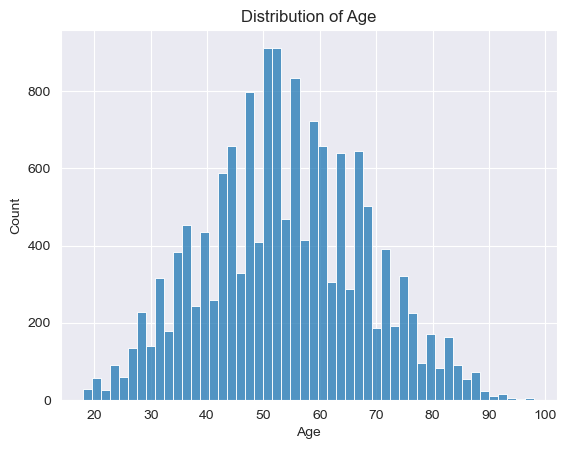

In [22]:
sns.histplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

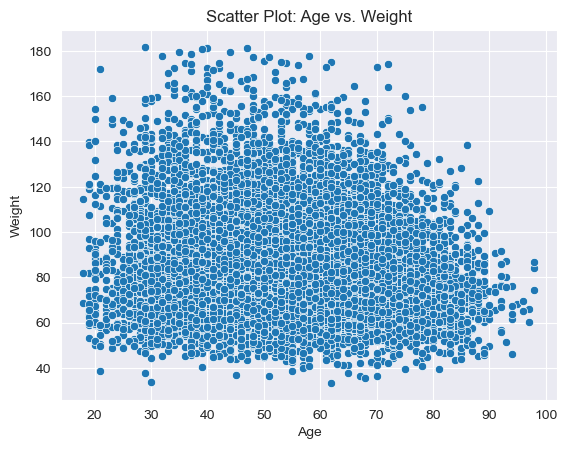

In [23]:
sns.scatterplot(x='age', y='weight_kg', data=df)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Scatter Plot: Age vs. Weight')
plt.show()
#Hence it concludes that there is no relationship of age and weight

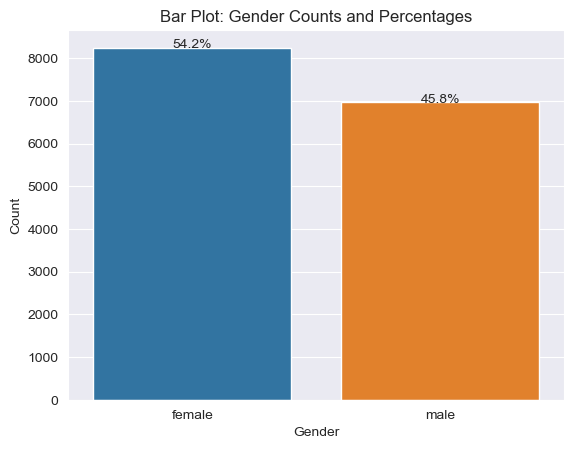

In [24]:
ax = sns.countplot(x='gender',data=df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, f'{height / total * 100:.1f}%', ha="center")
    
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot: Gender Counts and Percentages')
plt.show()

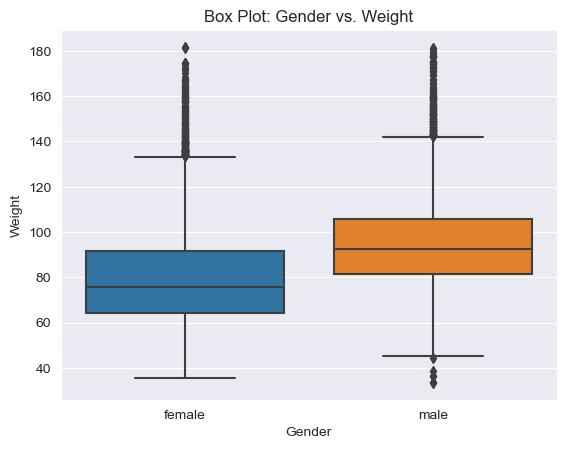

In [25]:
sns.boxplot(x='gender', y='weight_kg', data=df)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Box Plot: Gender vs. Weight')
plt.show()
#Therefore, we can see that there is a relationship between gender and the weight

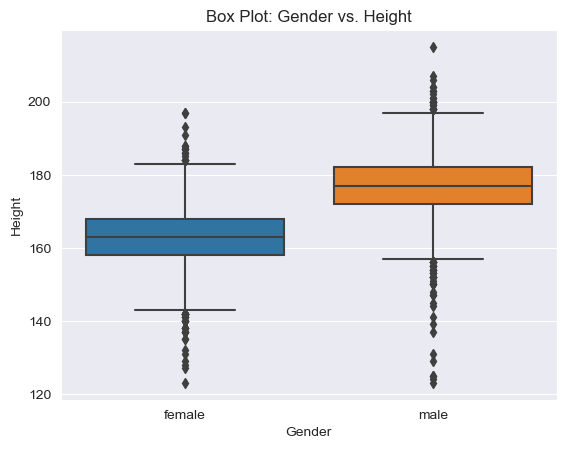

In [26]:
sns.boxplot(x='gender', y='height_cm', data=df)
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title('Box Plot: Gender vs. Height')
plt.show()
#Hence there is a relationship between height and gender

In [27]:
df['weight_kg'] = df.groupby('gender', group_keys=False)['weight_kg'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['height_cm'] = df.groupby('gender', group_keys=False)['height_cm'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
df['bmi'] = df.apply(lambda row: row['weight_kg'] / ((row['height_cm'] / 100) ** 2) if pd.isna(row['bmi']) else row['bmi'], axis=1)

In [28]:
df.head() #End solving missing values of weight, height and BMI

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,female,60.000000,163.000000,22.690939,6261,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
1,2,67,female,70.400000,168.000000,24.884028,624,0,74.166667,NaN,74.166667,74.166667,NaN,74.166667
2,3,53,male,105.800000,186.000000,30.453537,1783,0,55.666667,NaN,55.666667,55.666667,NaN,55.666667
3,4,56,male,109.300000,170.000000,37.830100,3143,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,68,male,95.303713,177.094254,30.387914,1836,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000


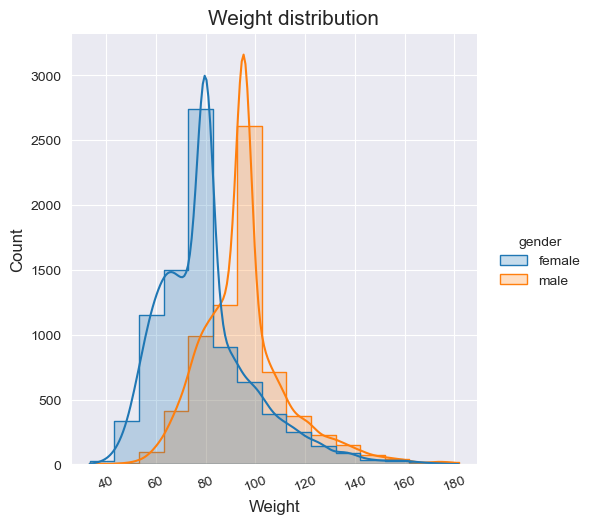

In [29]:
a = sns.displot(df, x="weight_kg", bins=15, kde=True, hue='gender', element="step")

a.fig.set_dpi(100)
a.fig.suptitle("Weight distribution", y = 1.02, size = 15)
plt.xlabel('Weight', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation=20)

plt.show()

In [30]:
df.isnull().sum()

id                   0
age                  0
gender               0
weight_kg            0
height_cm            0
bmi                  0
futime               0
status               0
avg_pre_hdl       1219
avg_post_hdl      2442
avg_total_hdl        0
avg_pre_chol      1219
avg_post_chol     2442
avg_total_chol       0
dtype: int64

In [31]:
#Now handling the missing values of pre and post hdl and chol values
columns_to_check = ['avg_pre_hdl', 'avg_post_hdl', 'avg_pre_chol', 'avg_post_chol']
df_dropped_missing = df.dropna(subset=columns_to_check)


In [32]:
df_dropped_missing.isnull().sum()

id                0
age               0
gender            0
weight_kg         0
height_cm         0
bmi               0
futime            0
status            0
avg_pre_hdl       0
avg_post_hdl      0
avg_total_hdl     0
avg_pre_chol      0
avg_post_chol     0
avg_total_chol    0
dtype: int64

In [33]:
df = df_dropped_missing
df.shape

(11543, 14)

In [34]:
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,female,60.000000,163.000000,22.690939,6261,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
3,4,56,male,109.300000,170.000000,37.830100,3143,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,68,male,95.303713,177.094254,30.387914,1836,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000
5,6,39,female,63.900000,155.000000,26.615590,1581,0,50.000000,69.000000,57.600000,50.000000,69.000000,57.600000
6,7,49,female,66.200000,161.000000,25.519339,3109,0,61.444444,77.583333,70.666667,61.444444,77.583333,70.666667


In [35]:
#Correaltion Analysis
df.corr()

C:\Users\Isini\AppData\Local\Temp\ipykernel_1780\308299791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
id,1.000000,-0.015399,-0.001006,-0.003836,-0.000089,-0.004214,-0.000637,-0.007631,-0.010985,-0.007290,-0.007631,-0.010985,-0.007290
age,-0.015399,1.000000,-0.127544,-0.165912,-0.051957,-0.183811,0.279931,0.111891,0.050629,0.084341,0.111891,0.050629,0.084341
weight_kg,-0.001006,-0.127544,1.000000,0.452189,0.860009,-0.031161,-0.004355,-0.419337,-0.404193,-0.432440,-0.419337,-0.404193,-0.432440
height_cm,-0.003836,-0.165912,0.452189,1.000000,-0.051669,0.006711,-0.040901,-0.296050,-0.259430,-0.292095,-0.296050,-0.259430,-0.292095
bmi,-0.000089,-0.051957,0.860009,-0.051669,1.000000,-0.036700,0.019030,-0.306802,-0.309785,-0.323255,-0.306802,-0.309785,-0.323255
futime,-0.004214,-0.183811,-0.031161,0.006711,-0.036700,1.000000,-0.071705,0.007376,0.045163,0.046063,0.007376,0.045163,0.046063
status,-0.000637,0.279931,-0.004355,-0.040901,0.019030,-0.071705,1.000000,-0.044553,-0.076817,-0.059326,-0.044553,-0.076817,-0.059326
avg_pre_hdl,-0.007631,0.111891,-0.419337,-0.296050,-0.306802,0.007376,-0.044553,1.000000,0.838957,0.952561,1.000000,0.838957,0.952561
avg_post_hdl,-0.010985,0.050629,-0.404193,-0.259430,-0.309785,0.045163,-0.076817,0.838957,1.000000,0.945456,0.838957,1.000000,0.945456
avg_total_hdl,-0.007290,0.084341,-0.432440,-0.292095,-0.323255,0.046063,-0.059326,0.952561,0.945456,1.000000,0.952561,0.945456,1.000000


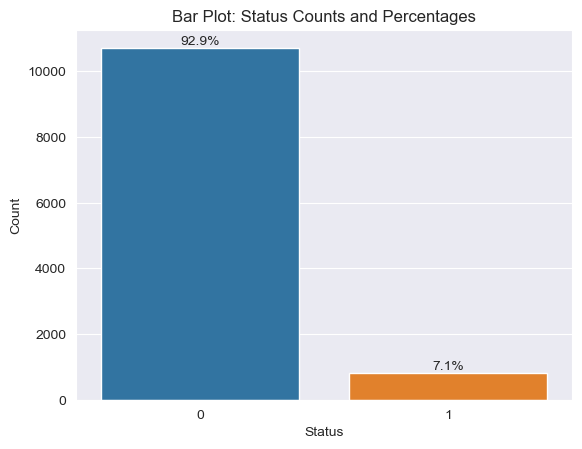

In [36]:
bx = sns.countplot(x='status',data=df)
total = len(df)
for p in bx.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    bx.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Bar Plot: Status Counts and Percentages')
plt.show()

# grouped bar chart

In [37]:
groupby_gender = df.groupby(['gender', 'status']).size().unstack()
groupby_gender

status,0,1
gender,,
female,5981,398
male,4742,422


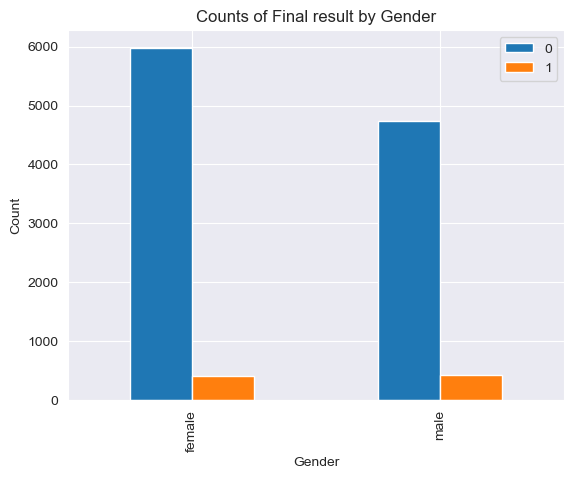

In [38]:
ax = groupby_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Final result by Gender')
ax.legend(loc='upper right')
plt.show()

# age

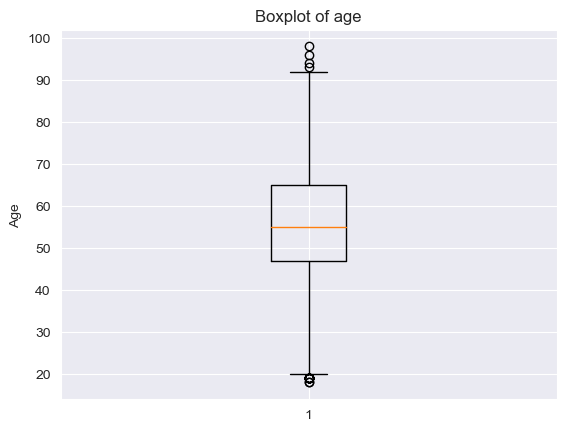

In [39]:
plt.boxplot(df['age'])
plt.ylabel('Age')
plt.title('Boxplot of age')
plt.show()

In [40]:
df['age'].mean()

55.311444165294986

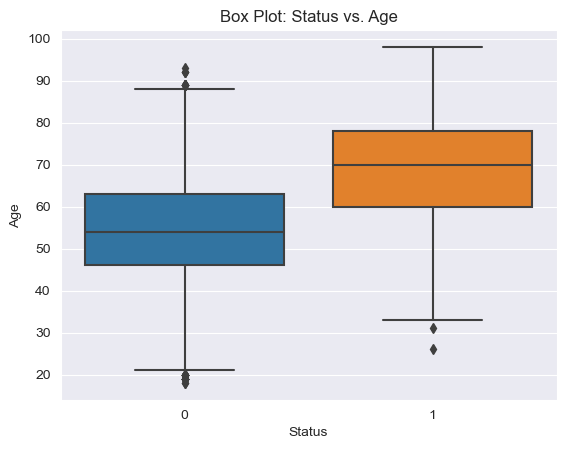

In [41]:
sns.boxplot(x='status', y='age', data=df)
plt.xlabel('Status')
plt.ylabel('Age')
plt.title('Box Plot: Status vs. Age')
plt.show()

In [42]:
df['futime'] = df['futime']/365
df['futime'] 
#groupby_futime = df.groupby(['futime', 'status']).size().unstack()


C:\Users\Isini\AppData\Local\Temp\ipykernel_1780\2547387514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['futime'] = df['futime']/365


0        17.153425
3         8.610959
4         5.030137
5         4.331507
6         8.517808
           ...    
15196     3.736986
15197    10.934247
15200     5.189041
15201    10.523288
15203     7.517808
Name: futime, Length: 11543, dtype: float64

In [43]:
groupby_gender = df.groupby(['futime', 'status']).size().unstack()
groupby_gender.mean()

status
0    2.344338
1    1.105121
dtype: float64

# BMI

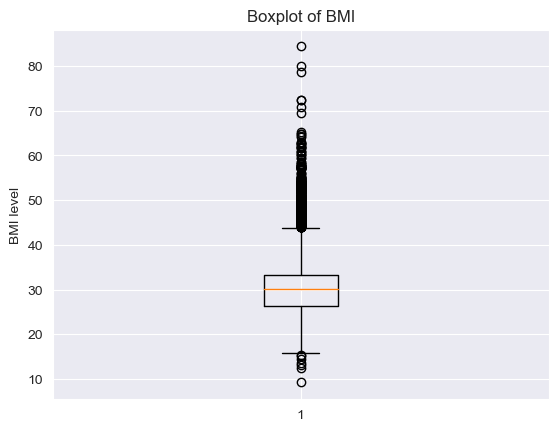

In [44]:
plt.boxplot(df['bmi'])
plt.ylabel('BMI level')
plt.title('Boxplot of BMI')
plt.show()

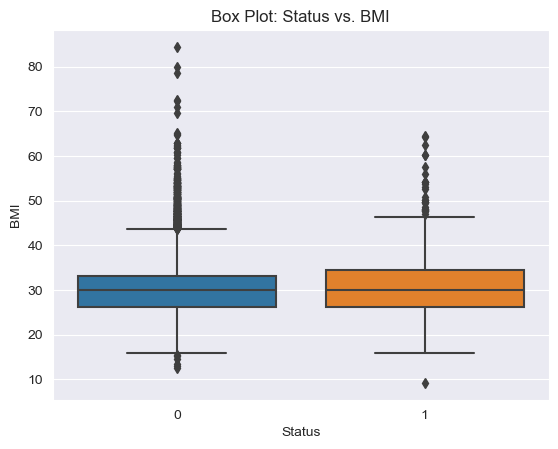

In [45]:
sns.boxplot(x='status', y='bmi', data=df)
plt.xlabel('Status')
plt.ylabel('BMI')
plt.title('Box Plot: Status vs. BMI')
plt.show()

# Height

In [46]:
df['height_cm'].min()

123.0

In [47]:
df['height_cm'].max()

215.0

# Weight

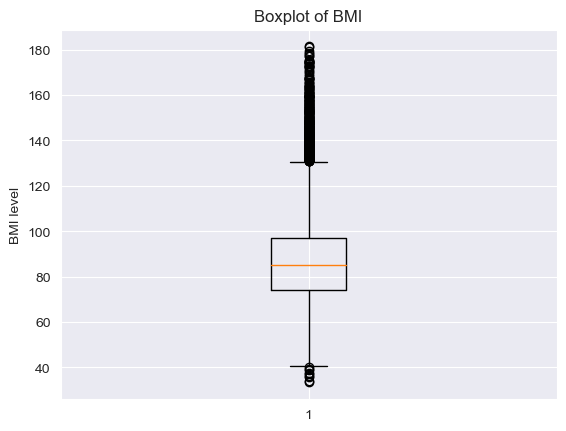

In [48]:
plt.boxplot(df['weight_kg'])
plt.ylabel('BMI level')
plt.title('Boxplot of BMI')
plt.show()

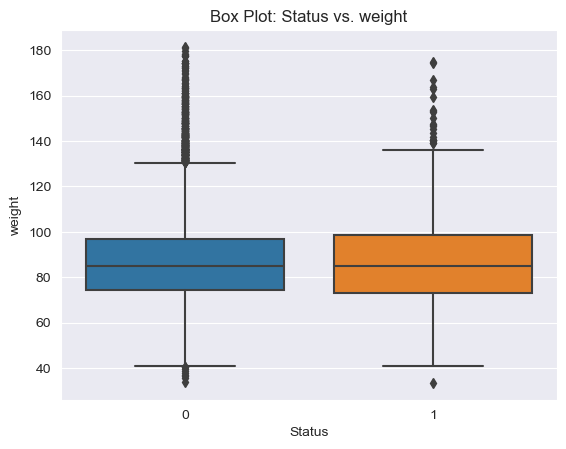

In [49]:
sns.boxplot(x='status', y='weight_kg', data=df)
plt.xlabel('Status')
plt.ylabel('weight')
plt.title('Box Plot: Status vs. weight')
plt.show()

# Clinical data

In [50]:
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,female,60.000000,163.000000,22.690939,17.153425,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
3,4,56,male,109.300000,170.000000,37.830100,8.610959,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,68,male,95.303713,177.094254,30.387914,5.030137,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000
5,6,39,female,63.900000,155.000000,26.615590,4.331507,0,50.000000,69.000000,57.600000,50.000000,69.000000,57.600000
6,7,49,female,66.200000,161.000000,25.519339,8.517808,0,61.444444,77.583333,70.666667,61.444444,77.583333,70.666667


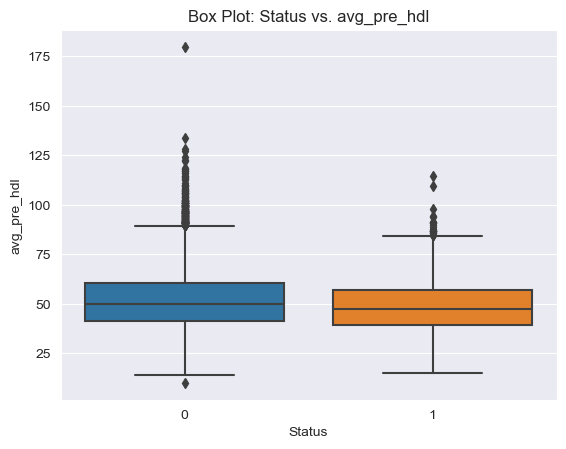

In [51]:
sns.boxplot(x='status', y='avg_pre_hdl', data=df)
plt.xlabel('Status')
plt.ylabel('avg_pre_hdl')
plt.title('Box Plot: Status vs. avg_pre_hdl')
plt.show()

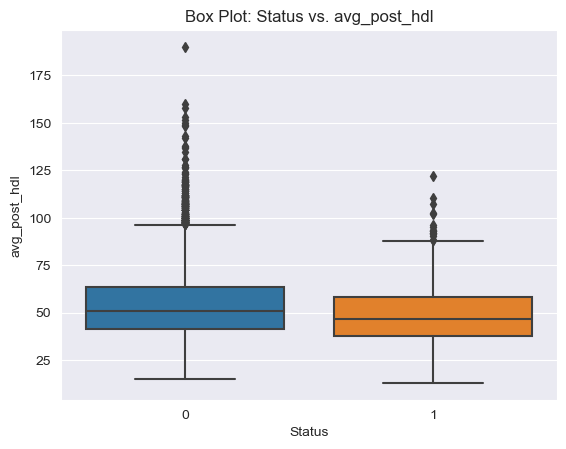

In [52]:
sns.boxplot(x='status', y='avg_post_hdl', data=df)
plt.xlabel('Status')
plt.ylabel('avg_post_hdl')
plt.title('Box Plot: Status vs. avg_post_hdl')
plt.show()

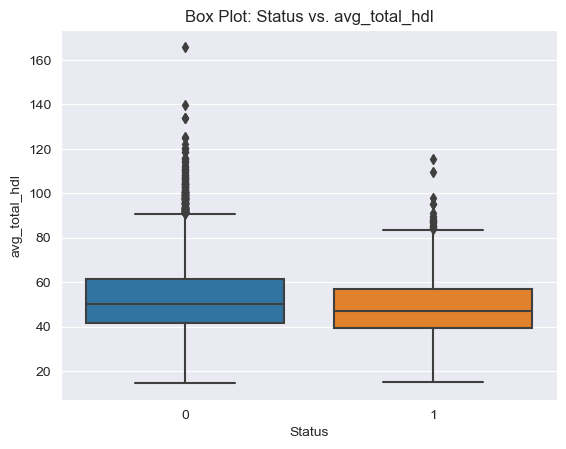

In [53]:
sns.boxplot(x='status', y='avg_total_hdl', data=df)
plt.xlabel('Status')
plt.ylabel('avg_total_hdl')
plt.title('Box Plot: Status vs. avg_total_hdl')
plt.show()

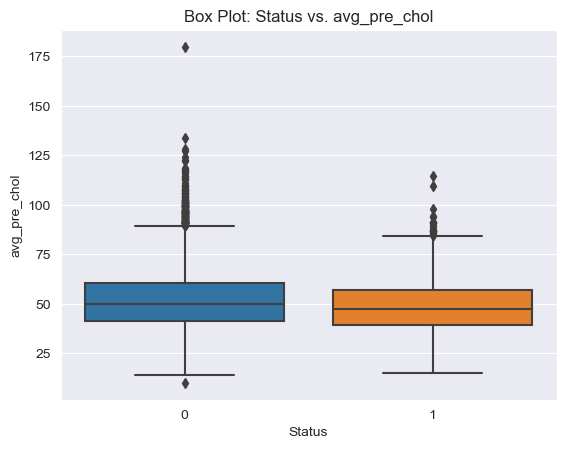

In [54]:
sns.boxplot(x='status', y='avg_pre_chol', data=df)
plt.xlabel('Status')
plt.ylabel('avg_pre_chol')
plt.title('Box Plot: Status vs. avg_pre_chol')
plt.show()

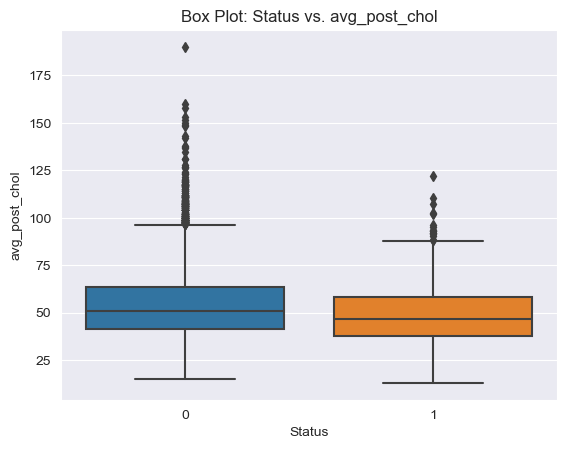

In [55]:
sns.boxplot(x='status', y='avg_post_chol', data=df)
plt.xlabel('Status')
plt.ylabel('avg_post_chol')
plt.title('Box Plot: Status vs. avg_post_chol')
plt.show()

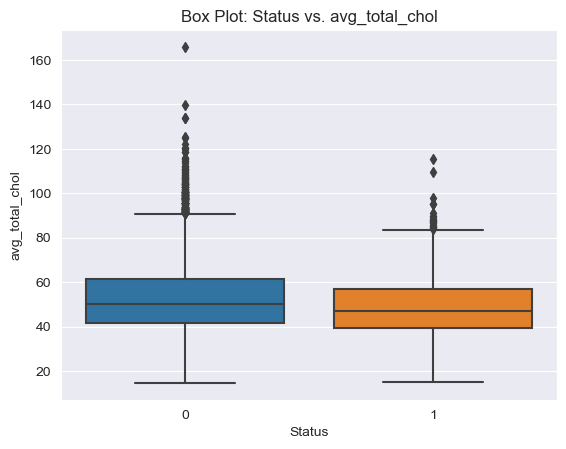

In [56]:
sns.boxplot(x='status', y='avg_total_chol', data=df)
plt.xlabel('Status')
plt.ylabel('avg_total_chol')
plt.title('Box Plot: Status vs. avg_total_chol')
plt.show()

In [57]:
#pip install statsmodels

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [59]:
x = add_constant(df)

### correlation

In [60]:
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,female,60.000000,163.000000,22.690939,17.153425,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
3,4,56,male,109.300000,170.000000,37.830100,8.610959,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,68,male,95.303713,177.094254,30.387914,5.030137,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000
5,6,39,female,63.900000,155.000000,26.615590,4.331507,0,50.000000,69.000000,57.600000,50.000000,69.000000,57.600000
6,7,49,female,66.200000,161.000000,25.519339,8.517808,0,61.444444,77.583333,70.666667,61.444444,77.583333,70.666667


In [61]:
df.columns

Index(['id', 'age', 'gender', 'weight_kg', 'height_cm', 'bmi', 'futime',
       'status', 'avg_pre_hdl', 'avg_post_hdl', 'avg_total_hdl',
       'avg_pre_chol', 'avg_post_chol', 'avg_total_chol'],
      dtype='object')

In [62]:
numerical_var = df[['age',  'weight_kg', 'height_cm', 'bmi', 'futime',
        'avg_pre_hdl', 'avg_post_hdl', 'avg_total_hdl',
       'avg_pre_chol', 'avg_post_chol', 'avg_total_chol']]
numerical_var

,age,weight_kg,height_cm,bmi,futime,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,57,60.000000,163.000000,22.690939,17.153425,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
3,56,109.300000,170.000000,37.830100,8.610959,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,68,95.303713,177.094254,30.387914,5.030137,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000
5,39,63.900000,155.000000,26.615590,4.331507,50.000000,69.000000,57.600000,50.000000,69.000000,57.600000
6,49,66.200000,161.000000,25.519339,8.517808,61.444444,77.583333,70.666667,61.444444,77.583333,70.666667
...,...,...,...,...,...,...,...,...,...,...,...
15196,46,72.600000,167.000000,26.013913,3.736986,48.500000,55.333333,52.600000,48.500000,55.333333,52.600000
15197,72,106.800000,168.000000,38.035584,10.934247,62.000000,68.000000,67.076923,62.000000,68.000000,67.076923
15200,46,53.000000,161.000000,20.501023,5.189041,55.333333,86.000000,63.000000,55.333333,86.000000,63.000000
15201,52,111.800000,154.000000,47.335905,10.523288,35.058824,34.894737,34.972222,35.058824,34.894737,34.972222


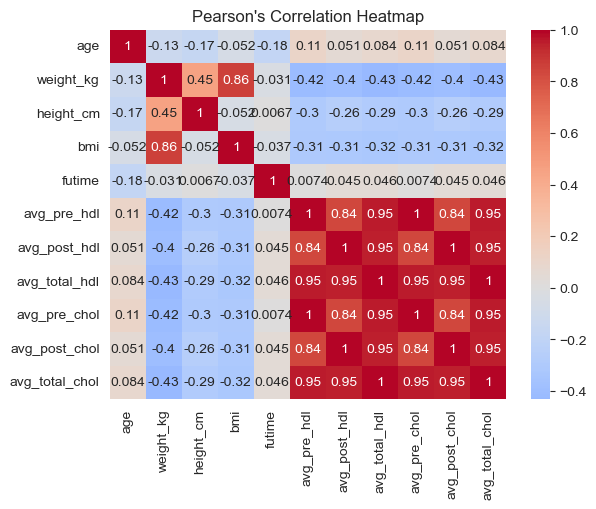

In [63]:
numerical_var = df[['age',  'weight_kg', 'height_cm', 'bmi', 'futime',
        'avg_pre_hdl', 'avg_post_hdl', 'avg_total_hdl',
       'avg_pre_chol', 'avg_post_chol', 'avg_total_chol']]

# Calculate Pearson's correlation coefficients
correlation_matrix = np.corrcoef(numerical_var.values, rowvar=False)

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            xticklabels=numerical_var.columns, yticklabels=numerical_var.columns)
plt.title("Pearson's Correlation Heatmap")
plt.show()

### Spearman's correlation test ( numerical- categorical)


In [64]:
col = df.columns

In [65]:
import scipy.stats
for i in numerical_var:
    spearman_corr, p_value = scipy.stats.spearmanr(df['status'], df[i])

    print("Spearman's Rank Correlation Coefficient between", i , "and status:", spearman_corr)
    print("P-value:", p_value)


Spearman's Rank Correlation Coefficient between age and status: 0.25868496177131134
P-value: 7.586310318008574e-176
Spearman's Rank Correlation Coefficient between weight_kg and status: -0.00496116398211323
P-value: 0.5940579125589365
Spearman's Rank Correlation Coefficient between height_cm and status: -0.037878774956094416
P-value: 4.688147995213879e-05
Spearman's Rank Correlation Coefficient between bmi and status: 0.014366317454800125
P-value: 0.1227323003471097
Spearman's Rank Correlation Coefficient between futime and status: -0.07704934976934281
P-value: 1.1374161027962287e-16
Spearman's Rank Correlation Coefficient between avg_pre_hdl and status: -0.04559324511482645
P-value: 9.56022945097248e-07
Spearman's Rank Correlation Coefficient between avg_post_hdl and status: -0.07593402948832957
P-value: 3.105971399919724e-16
Spearman's Rank Correlation Coefficient between avg_total_hdl and status: -0.05906182807466764
P-value: 2.1480869571324316e-10
Spearman's Rank Correlation Coeffi

### Chi squared test ( categorical - categorical)

In [66]:
cat_var = df[['gender','status']]


In [67]:
contingency_table = pd.crosstab(cat_var['gender'], cat_var['status'])

# Perform the chi-squared test for independence
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-squared: 15.862191336511895
P-value: 6.812622849410114e-05
Degrees of Freedom: 1
Expected Frequencies:
 [[5925.8439747  453.1560253]
 [4797.1560253  366.8439747]]


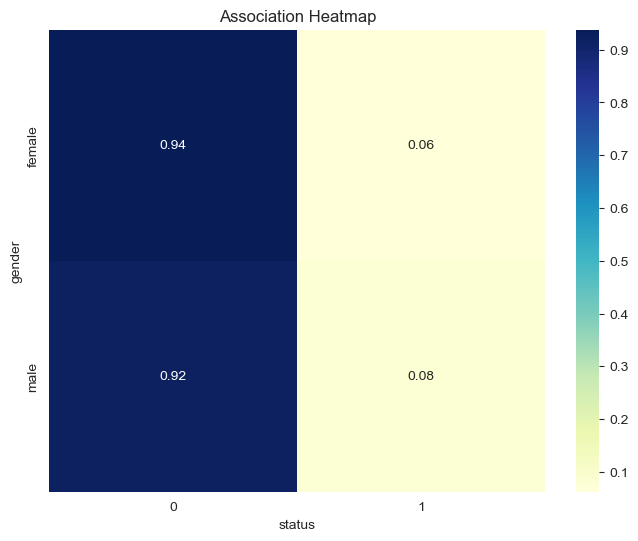

In [68]:
contingency_table = pd.crosstab(cat_var['gender'], cat_var['status'])

# Perform the chi-squared test for independence
contingency_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_proportions, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Association Heatmap")
plt.show()

In [74]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#### Cramer's V heat map

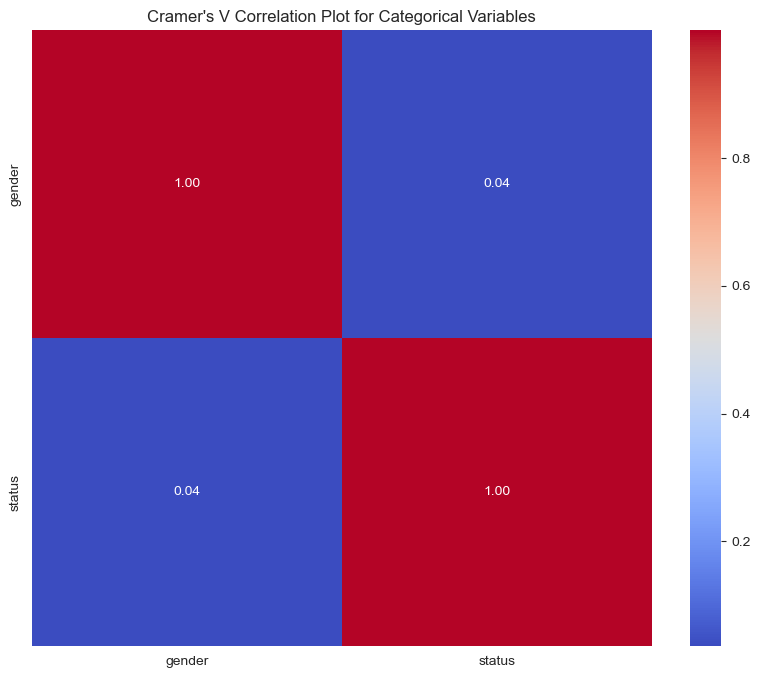

In [75]:
#cramer's v heatmap
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Extracted categorical variables
categorical_variables = df.drop(columns = numerical_var)

# Calculate Cramer's V correlation matrix
cramer_matrix = pd.DataFrame(index=cat_var.columns, columns=cat_var.columns, dtype=float)
for i in cat_var.columns:
    for j in cat_var.columns:
        cramers = cramers_v(cat_var[i], cat_var[j])
        cramer_matrix.loc[i, j] = cramers

# Create a Cramer's V correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramer's V Correlation Plot for Categorical Variables")
plt.show()
